In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
from google.colab import files
files.upload()

Saving Delivery Fleet.csv to Delivery Fleet.csv


{'Delivery Fleet.csv': b'Driver_ID,Distance_Feature,Speeding_Feature\r\n3423311935,71.24,28.0\r\n3423313212,52.53,25.0\r\n3423313724,64.54,27.0\r\n3423311373,55.69,22.0\r\n3423310999,54.58,25.0\r\n3423313857,41.91,10.0\r\n3423312432,58.64,20.0\r\n3423311434,52.02,8.0\r\n3423311328,31.25,34.0\r\n3423312488,44.31,19.0\r\n3423311254,49.35,40.0\r\n3423312943,58.07,45.0\r\n3423312536,44.22,22.0\r\n3423311542,55.73,19.0\r\n3423312176,46.63,43.0\r\n3423314176,52.97,32.0\r\n3423314202,46.25,35.0\r\n3423311346,51.55,27.0\r\n3423310666,57.05,26.0\r\n3423313527,58.45,30.0\r\n3423312182,43.42,23.0\r\n3423313590,55.68,37.0\r\n3423312268,55.15,18.0\r\n3423314255,43.84,22.0\r\n3423311976,59.26,32.0\r\n3423312669,37.14,41.0\r\n3423310697,64.3,29.0\r\n3423312113,45.75,16.0\r\n3423313343,45.97,23.0\r\n3423311431,56.04,39.0\r\n3423310755,33.64,45.0\r\n3423311821,41.67,33.0\r\n3423314359,50.68,39.0\r\n3423313106,54.22,35.0\r\n3423310754,56.2,29.0\r\n3423310524,46.16,41.0\r\n3423311780,50.22,24.0\r\n342331

In [ ]:
data=pd.read_csv('Delivery Fleet.csv')

In [ ]:
print(data.head())

    Driver_ID  Distance_Feature  Speeding_Feature
0  3423311935             71.24              28.0
1  3423313212             52.53              25.0
2  3423313724             64.54              27.0
3  3423311373             55.69              22.0
4  3423310999             54.58              25.0


In [ ]:
print(data.tail())

       Driver_ID  Distance_Feature  Speeding_Feature
3995  3423310685            160.04              10.0
3996  3423312600            176.17               5.0
3997  3423312921            170.91              12.0
3998  3423313630            176.14               5.0
3999  3423311533            168.03               9.0


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Driver_ID         4000 non-null   int64  
 1   Distance_Feature  4000 non-null   float64
 2   Speeding_Feature  4000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 93.9 KB
None


In [ ]:
print(data.describe())

          Driver_ID  Distance_Feature  Speeding_Feature
count  4.000000e+03       4000.000000       4000.000000
mean   3.423312e+09         76.041522         10.721000
std    1.154845e+03         53.469563         13.708543
min    3.423310e+09         15.520000          0.000000
25%    3.423311e+09         45.247500          4.000000
50%    3.423312e+09         53.330000          6.000000
75%    3.423313e+09         65.632500          9.000000
max    3.423314e+09        244.790000        100.000000


In [ ]:
print(data)

       Driver_ID  Distance_Feature  Speeding_Feature
0     3423311935             71.24              28.0
1     3423313212             52.53              25.0
2     3423313724             64.54              27.0
3     3423311373             55.69              22.0
4     3423310999             54.58              25.0
...          ...               ...               ...
3995  3423310685            160.04              10.0
3996  3423312600            176.17               5.0
3997  3423312921            170.91              12.0
3998  3423313630            176.14               5.0
3999  3423311533            168.03               9.0

[4000 rows x 3 columns]


In [ ]:
print("Jumlah Baris:", data.shape[0])
print("Jumlah Kolom:", data.shape[1])

Jumlah Baris: 4000
Jumlah Kolom: 3


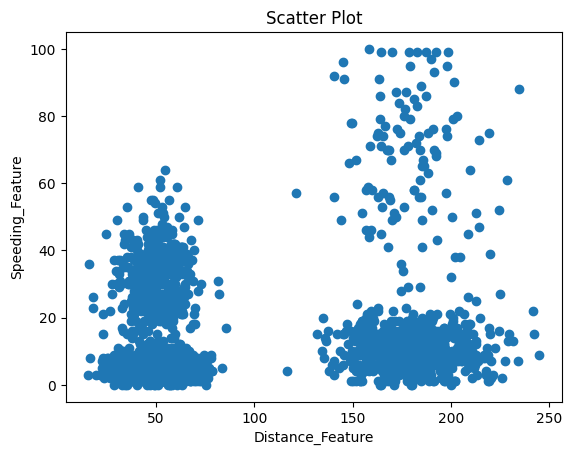

In [ ]:
#Scatter Plot
plt.scatter(data['Distance_Feature'], data['Speeding_Feature'])
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.title('Scatter Plot')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

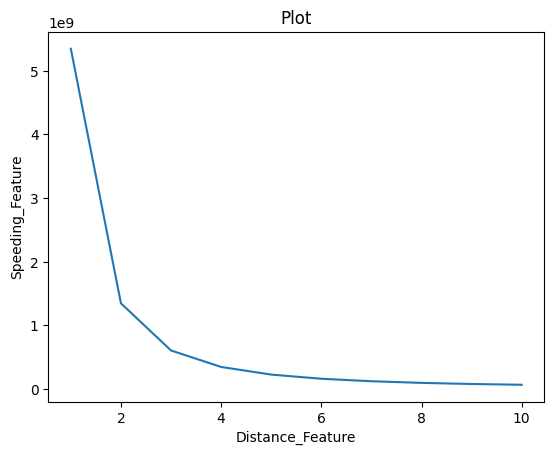

In [ ]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Plot')
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [ ]:
labels = dbscan.fit_predict(data)

In [ ]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17])

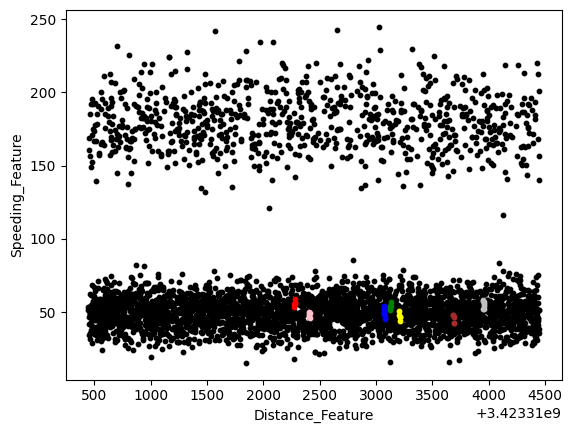

In [ ]:
import matplotlib.pyplot as plt

#Visualising The Clusters
# Use .iloc for integer-location based indexing
plt.scatter(data.iloc[labels == -1, 0], data.iloc[labels == -1, 1], s = 10, c ="black")
plt.scatter(data.iloc[labels == 0, 0], data.iloc[labels == 0, 1], s = 10, c ="blue")
plt.scatter(data.iloc[labels == 1, 0], data.iloc[labels == 1, 1], s = 10, c ="red")
plt.scatter(data.iloc[labels == 2, 0], data.iloc[labels == 2, 1], s = 10, c ="green")
plt.scatter(data.iloc[labels == 3, 0], data.iloc[labels == 3, 1], s = 10, c ="brown")
plt.scatter(data.iloc[labels == 4, 0], data.iloc[labels == 4, 1], s = 10, c ="pink")
plt.scatter(data.iloc[labels == 5, 0], data.iloc[labels == 5, 1], s = 10, c ="yellow")
plt.scatter(data.iloc[labels == 6, 0], data.iloc[labels == 6, 1], s = 10, c ="silver")

plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()